https://www.kaggle.com/datasets/andrewmvd/divorce-prediction

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
df = pd.read_csv('divorce_data.csv', delimiter = ';')
df.columns
df.info()
df.corr()
plt.matshow(df.corr(), cmap = 'gray')
plt.show()
corr = df.corr()
corr.style.background_gradient(cmap = 'coolwarm')
import seaborn as sns
sns.heatmap(df.corr())
sns.pairplot(df, vars = ['Q1', 'Q2'])
x = df.drop(['Divorce'], axis = 1)
y = df['Divorce']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 23)
x_train.shape, x_test.shape, y_train.shape, y_test.shape
dct = DecisionTreeClassifier(random_state = 0, max_depth = 4)
%time dct.fit(x_train, y_train)

print("Training_accuracy:", accuracy_score(y_train, dct.predict(x_train)))
print("Testing_accuracy:", accuracy_score(y_test, dct.predict(x_test)))
l = LogisticRegression(random_state = 0)
%time l.fit(x_train, y_train)

print("Training_accuracy:", accuracy_score(y_train, l.predict(x_train)))
print("Testing_accuracy:", accuracy_score(y_test, l.predict(x_test)))
from sklearn.model_selection import cross_val_score
scores = cross_val_score(l, x, y, cv = 5)
scores

l.coef_

In [8]:
df = pd.read_csv('divorce_data.csv', delimiter = ';')
df.columns

Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
       'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31',
       'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40', 'Q41',
       'Q42', 'Q43', 'Q44', 'Q45', 'Q46', 'Q47', 'Q48', 'Q49', 'Q50', 'Q51',
       'Q52', 'Q53', 'Q54', 'Divorce'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 55 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Q1       170 non-null    int64
 1   Q2       170 non-null    int64
 2   Q3       170 non-null    int64
 3   Q4       170 non-null    int64
 4   Q5       170 non-null    int64
 5   Q6       170 non-null    int64
 6   Q7       170 non-null    int64
 7   Q8       170 non-null    int64
 8   Q9       170 non-null    int64
 9   Q10      170 non-null    int64
 10  Q11      170 non-null    int64
 11  Q12      170 non-null    int64
 12  Q13      170 non-null    int64
 13  Q14      170 non-null    int64
 14  Q15      170 non-null    int64
 15  Q16      170 non-null    int64
 16  Q17      170 non-null    int64
 17  Q18      170 non-null    int64
 18  Q19      170 non-null    int64
 19  Q20      170 non-null    int64
 20  Q21      170 non-null    int64
 21  Q22      170 non-null    int64
 22  Q23      170 non-null    i

In [12]:
df.tail()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Divorce
165,0,0,0,0,0,0,0,0,0,0,...,1,0,4,1,1,4,2,2,2,0
166,0,0,0,0,0,0,0,0,0,0,...,4,1,2,2,2,2,3,2,2,0
167,1,1,0,0,0,0,0,0,0,1,...,3,0,2,0,1,1,3,0,0,0
168,0,0,0,0,0,0,0,0,0,0,...,3,3,2,2,3,2,4,3,1,0
169,0,0,0,0,0,0,0,1,0,0,...,3,4,4,0,1,3,3,3,1,0


In [14]:
df.corr()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Divorce
Q1,1.000000,0.819066,0.832508,0.825066,0.881272,0.287140,0.427989,0.802357,0.845916,0.790183,...,0.400296,0.582693,0.633564,0.674843,0.725443,0.684143,0.575463,0.611422,0.768522,0.861324
Q2,0.819066,1.000000,0.805876,0.791313,0.819360,0.102843,0.417616,0.864284,0.827711,0.782286,...,0.389519,0.616884,0.643762,0.659841,0.680538,0.636558,0.536294,0.610726,0.728897,0.820774
Q3,0.832508,0.805876,1.000000,0.806709,0.800774,0.263032,0.464071,0.757264,0.816653,0.753017,...,0.308149,0.544863,0.638256,0.647961,0.663995,0.600603,0.491803,0.598749,0.673012,0.806709
Q4,0.825066,0.791313,0.806709,1.000000,0.818472,0.185963,0.474806,0.798347,0.829053,0.873636,...,0.340240,0.552301,0.630205,0.699069,0.685263,0.624015,0.534264,0.588390,0.698264,0.819583
Q5,0.881272,0.819360,0.800774,0.818472,1.000000,0.297834,0.381378,0.877584,0.916327,0.823659,...,0.470758,0.719899,0.659220,0.762257,0.795960,0.742664,0.663855,0.719493,0.836799,0.893180
Q6,0.287140,0.102843,0.263032,0.185963,0.297834,1.000000,0.424212,0.184019,0.301342,0.266076,...,0.127759,0.212979,0.200673,0.201091,0.221100,0.179119,0.205056,0.258092,0.292428,0.420913
Q7,0.427989,0.417616,0.464071,0.474806,0.381378,0.424212,1.000000,0.412807,0.517522,0.498266,...,0.069850,0.254225,0.311110,0.291325,0.332370,0.349920,0.243104,0.313725,0.347493,0.544835
Q8,0.802357,0.864284,0.757264,0.798347,0.877584,0.184019,0.412807,1.000000,0.915301,0.828031,...,0.433541,0.675584,0.588531,0.674776,0.729668,0.690190,0.658613,0.705071,0.807911,0.869569
Q9,0.845916,0.827711,0.816653,0.829053,0.916327,0.301342,0.517522,0.915301,1.000000,0.852385,...,0.434318,0.693839,0.611726,0.711503,0.755509,0.713750,0.652376,0.699211,0.810977,0.912368
Q10,0.790183,0.782286,0.753017,0.873636,0.823659,0.266076,0.498266,0.828031,0.852385,1.000000,...,0.342315,0.559998,0.550313,0.659604,0.672236,0.618666,0.513842,0.592641,0.698528,0.834897


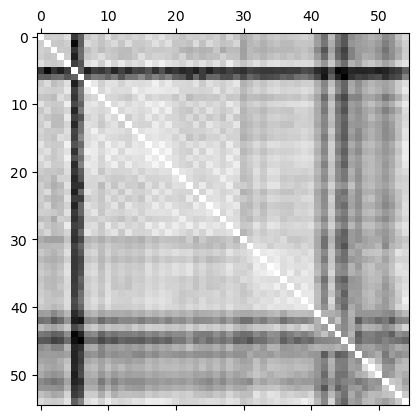

In [16]:
plt.matshow(df.corr(), cmap = 'gray')
plt.show()

In [18]:
corr = df.corr()
corr.style.background_gradient(cmap = 'coolwarm')

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44,Q45,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Divorce
Q1,1.000000,0.819066,0.832508,0.825066,0.881272,0.287140,0.427989,0.802357,0.845916,0.790183,0.892253,0.794307,0.842996,0.817099,0.848754,0.831822,0.895970,0.853739,0.900446,0.840966,0.815708,0.785280,0.822534,0.813233,0.822084,0.803507,0.829037,0.762102,0.858139,0.792257,0.699223,0.739679,0.799735,0.749774,0.796413,0.812867,0.786890,0.804129,0.817035,0.838355,0.804182,0.642307,0.482223,0.752972,0.510160,0.400296,0.582693,0.633564,0.674843,0.725443,0.684143,0.575463,0.611422,0.768522,0.861324
Q2,0.819066,1.000000,0.805876,0.791313,0.819360,0.102843,0.417616,0.864284,0.827711,0.782286,0.823380,0.862835,0.791073,0.875800,0.801316,0.806497,0.822317,0.883856,0.829422,0.884176,0.790468,0.795406,0.773018,0.868240,0.769244,0.861421,0.817364,0.776943,0.789827,0.844007,0.661210,0.735763,0.757286,0.714360,0.753566,0.781295,0.747088,0.751705,0.787768,0.788200,0.780757,0.648539,0.503894,0.699765,0.489062,0.389519,0.616884,0.643762,0.659841,0.680538,0.636558,0.536294,0.610726,0.728897,0.820774
Q3,0.832508,0.805876,1.000000,0.806709,0.800774,0.263032,0.464071,0.757264,0.816653,0.753017,0.805915,0.780258,0.758969,0.750602,0.806909,0.775528,0.808161,0.797395,0.798999,0.807892,0.796069,0.727933,0.706585,0.740476,0.724506,0.728653,0.797595,0.689914,0.755491,0.752391,0.652188,0.747669,0.726481,0.702500,0.730290,0.744390,0.736984,0.740642,0.759820,0.781657,0.739967,0.569293,0.385152,0.661830,0.427409,0.308149,0.544863,0.638256,0.647961,0.663995,0.600603,0.491803,0.598749,0.673012,0.806709
Q4,0.825066,0.791313,0.806709,1.000000,0.818472,0.185963,0.474806,0.798347,0.829053,0.873636,0.808533,0.793992,0.751623,0.757000,0.794184,0.878416,0.809968,0.835296,0.832750,0.815896,0.775132,0.839534,0.744783,0.776640,0.736228,0.762765,0.767206,0.827847,0.781792,0.772562,0.661251,0.746677,0.764381,0.729022,0.770813,0.794636,0.760451,0.790350,0.763502,0.798520,0.768706,0.639671,0.452479,0.707212,0.446798,0.340240,0.552301,0.630205,0.699069,0.685263,0.624015,0.534264,0.588390,0.698264,0.819583
Q5,0.881272,0.819360,0.800774,0.818472,1.000000,0.297834,0.381378,0.877584,0.916327,0.823659,0.936955,0.846513,0.915033,0.845576,0.879461,0.853561,0.947429,0.894474,0.943349,0.892909,0.871994,0.840265,0.888584,0.833608,0.888740,0.836194,0.883768,0.809789,0.925601,0.837501,0.785038,0.832032,0.879037,0.827560,0.878289,0.887498,0.859581,0.852601,0.866293,0.871809,0.864434,0.737922,0.613142,0.799453,0.591656,0.470758,0.719899,0.659220,0.762257,0.795960,0.742664,0.663855,0.719493,0.836799,0.893180
Q6,0.287140,0.102843,0.263032,0.185963,0.297834,1.000000,0.424212,0.184019,0.301342,0.266076,0.340135,0.209801,0.305109,0.224459,0.323787,0.311056,0.377330,0.251856,0.365227,0.230486,0.273564,0.220010,0.246478,0.191458,0.291159,0.200634,0.283895,0.254858,0.309302,0.266464,0.247634,0.316605,0.292037,0.279789,0.276539,0.287708,0.281458,0.297791,0.296121,0.351433,0.329765,0.227993,0.171599,0.339918,0.094820,0.127759,0.212979,0.200673,0.201091,0.221100,0.179119,0.205056,0.258092,0.292428,0.420913
Q7,0.427989,0.417616,0.464071,0.474806,0.381378,0.424212,1.000000,0.412807,0.517522,0.498266,0.432479,0.511761,0.373361,0.491021,0.494110,0.573290,0.461450,0.544550,0.469995,0.544207,0.409827,0.378915,0.254912,0.446469,0.288867,0.443149,0.444643,0.351262,0.349379,0.448569,0.334308,0.442306,0.395764,0.328700,0.349076,0.370158,0.431979,0.401769,0.477063,0.501758,0.445483,0.333211,0.149930,0.425874,0.199548,0.069850,0.254225,0.311110,0.291325,0.332370,0.349920,0.243104,0.313725,0.347493,0.544835
Q8,0.802357,0.864284,0.757264,0.798347,0.877584,0.184019,0.412807,1.000000,0.915301,0.828031,0.889795,0.890338,0.840350,0.888822,0.873804,0.865680,0.881005,0.941084,0.873546,0.922465,0.861939,0.857010,0.845731,0.896841,0.809110,0.883414,0.848766,0.822361,0.860194,0.902820,0.716731,0.762425,0.81868

<Axes: >

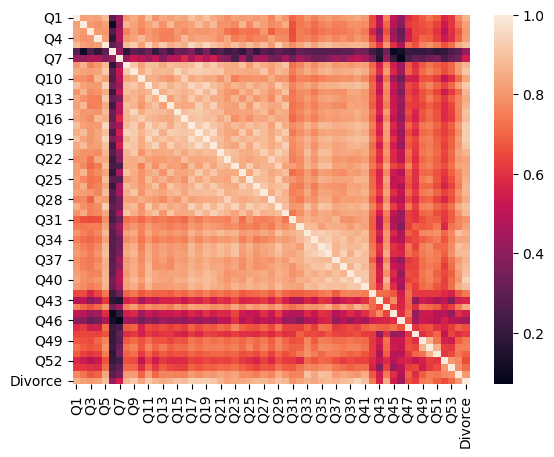

In [20]:
import seaborn as sns
sns.heatmap(df.corr())

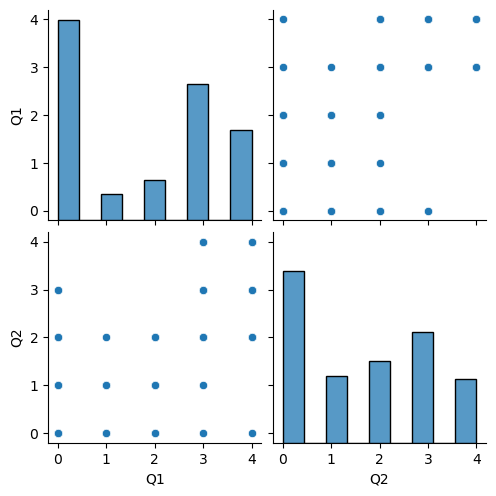

In [22]:
sns.pairplot(df, vars = ['Q1', 'Q2'])

In [24]:
x = df.drop(['Divorce'], axis = 1)
y = df['Divorce']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 23)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((102, 54), (68, 54), (102,), (68,))

In [32]:
dct = DecisionTreeClassifier(random_state = 0, max_depth = 4)
%time dct.fit(x_train, y_train)

CPU times: total: 0 ns
Wall time: 17.8 ms


DecisionTreeClassifier(max_depth=4, random_state=0)

In [34]:
print("Training_accuracy:", accuracy_score(y_train, dct.predict(x_train)))
print("Testing_accuracy:", accuracy_score(y_test, dct.predict(x_test)))

Training_accuracy: 1.0
Testing_accuracy: 0.9411764705882353


In [36]:
l = LogisticRegression(random_state = 0)
%time l.fit(x_train, y_train)

CPU times: total: 0 ns
Wall time: 10.7 ms


LogisticRegression(random_state=0)

In [38]:
print("Training_accuracy:", accuracy_score(y_train, l.predict(x_train)))
print("Testing_accuracy:", accuracy_score(y_test, l.predict(x_test)))

Training_accuracy: 1.0
Testing_accuracy: 1.0


In [46]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(l, x, y, cv = 5)
scores

array([0.88235294, 1.        , 1.        , 1.        , 1.        ])

In [48]:
l.coef_

array([[ 0.21867019,  0.25806459,  0.33116336,  0.17954234,  0.12390415,
         0.22857052, -0.00226648, -0.01947435, -0.00661444, -0.07300249,
         0.01997541,  0.23650533, -0.02147867,  0.13419207,  0.30337808,
         0.1259241 ,  0.32143263,  0.21586027,  0.25632019,  0.2973596 ,
         0.08357491, -0.02740121, -0.0487269 , -0.09139688,  0.09015223,
         0.42924647,  0.07752795,  0.29919192,  0.12667667,  0.16222076,
         0.26952284,  0.15273478,  0.15380833,  0.18721425,  0.0493987 ,
         0.20345084, -0.00760184,  0.2116157 ,  0.32911368,  0.53492461,
         0.24405227,  0.15391104,  0.08637976,  0.31447354,  0.00593383,
        -0.0994137 ,  0.10253863, -0.01215404,  0.4654812 ,  0.1799459 ,
        -0.0379034 ,  0.14606081,  0.2381795 , -0.15677328]])